In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
excel_path = '/content/gdrive/MyDrive/Makine öğrenmesi ödev/survey lung cancer.csv'
ds = pd.read_csv(excel_path, )
pd.set_option('max_colwidth', 150)
ds.head(309)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
ds.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

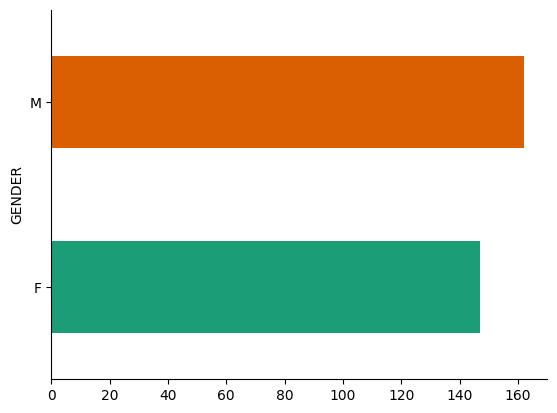

In [ ]:
ds.groupby('GENDER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

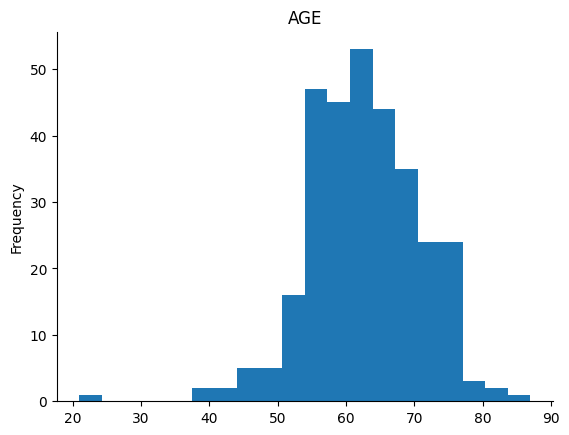

In [ ]:
ds['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

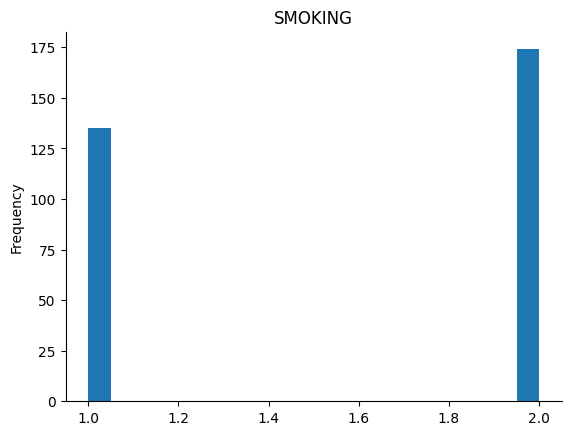

In [ ]:
ds['SMOKING'].plot(kind='hist', bins=20, title='SMOKING')
plt.gca().spines[['top', 'right',]].set_visible(False)

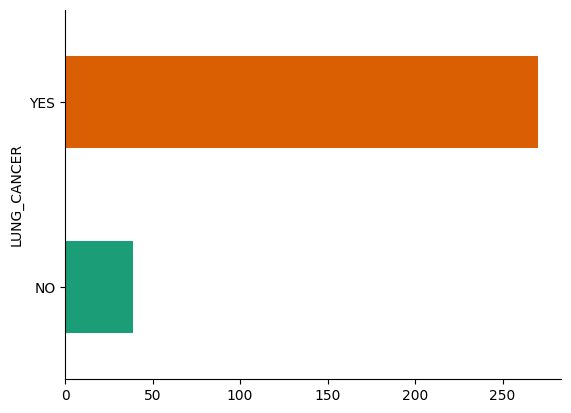

In [ ]:
ds.groupby('LUNG_CANCER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

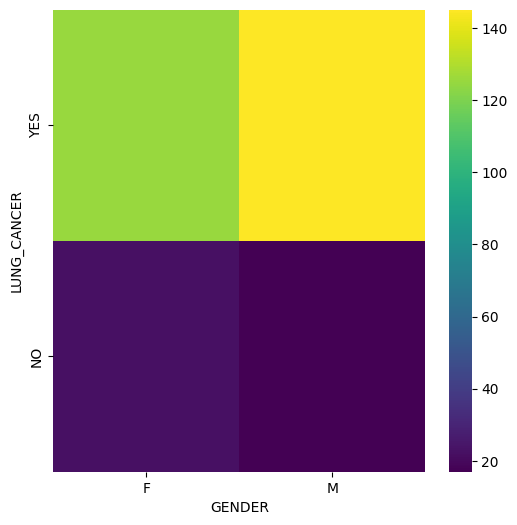

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['LUNG_CANCER'].value_counts()
    for x_label, grp in ds.groupby('GENDER')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('GENDER')
_ = plt.ylabel('LUNG_CANCER')

<ipython-input-11-5915257e6529>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(ds.corr(), cmap='RdBu_r', cbar=True, annot=True, linewidths=0.5, ax=ax)


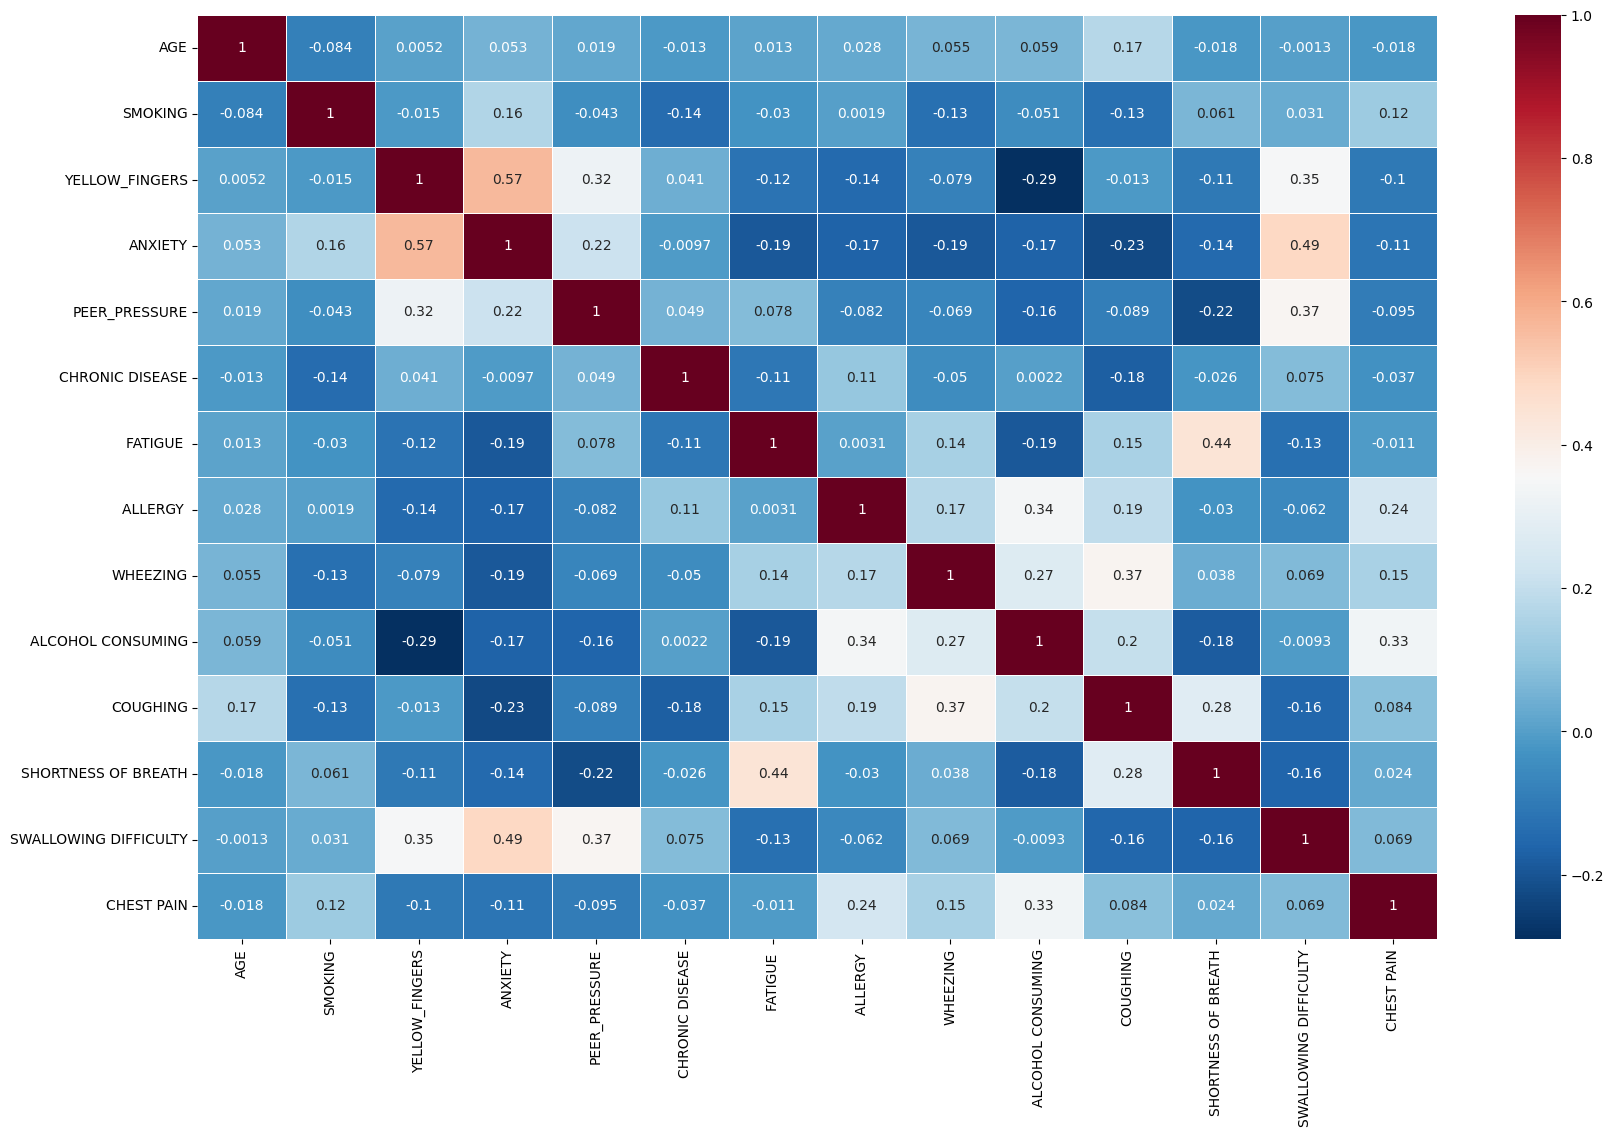

In [ ]:
fig, ax = plt.subplots(figsize = (20,12))
ax = sns.heatmap(ds.corr(), cmap='RdBu_r', cbar=True, annot=True, linewidths=0.5, ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
ds.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
x=ds[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y=ds['LUNG_CANCER']

In [ ]:
x

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
y

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuary = accuracy_score(y_test,y_pred)

In [ ]:
print('doğruluk= ',accuary)

doğruluk=  0.967741935483871


In [ ]:
ds

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
#veri setimizdeki 1 Değeri = Hayır anlamına 2 Değeri = Evet anlamına gelmektedir.

In [ ]:
prediction=model.predict([[63,1,2,1,1,1,1,1,1,2,1,1,1,1]])
print(prediction)

['NO']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pd = list(ds.iloc[245])
z = pd[15:]
z = np.array(z)
print(z)

['NO']


In [ ]:
from sklearn.tree import plot_tree

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

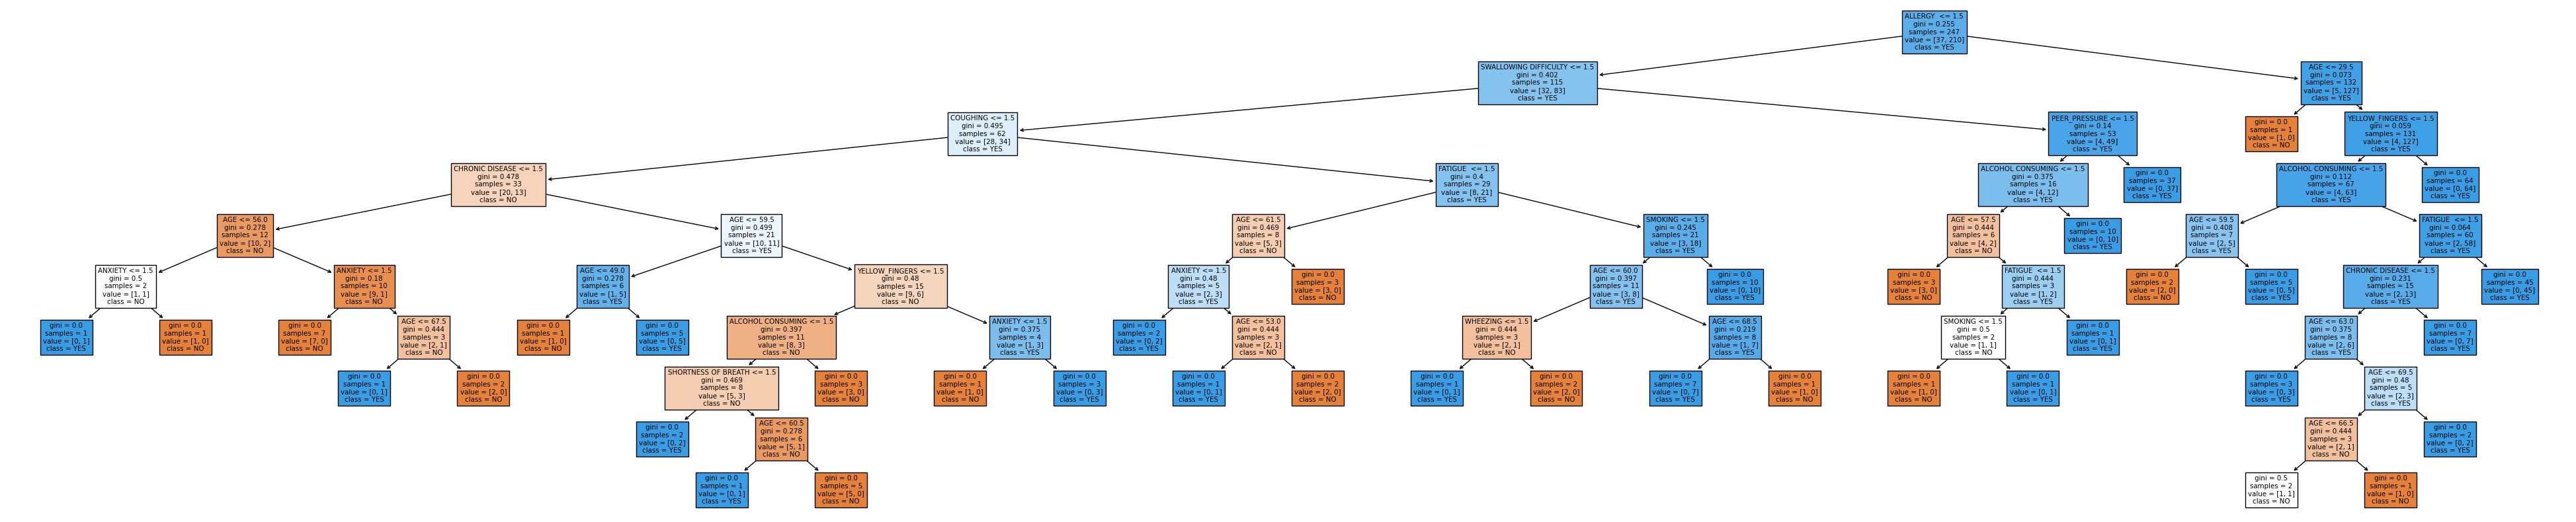

In [ ]:
plt.figure(figsize=(50,10))
plot_tree(model, feature_names=x.columns, class_names=model.classes_, filled=True)
plt.show()